## Дифференциальный зачет
 - Студент: Рудько Даниил
 - Группа: 8303

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

### Задача 1

In [2]:
cie = pd.read_csv("cccie31.csv")
cie[cie.wave==555]

,wave,x,y,z
39,555,0.337363,0.658848,0.003788


### Задача 2

$$
C_{\mathrm{linear}} = \left\{\begin{array}{ll}
\frac{C_{\mathrm{sRGB}}}{12.92} & \mathrm{если}\ C_{\mathrm{sRGB}} \leqslant 0.04045 \\
\left(\frac{C_{\mathrm{sRGB}} + 0.055}{1.055}\right)^{2.4} & \mathrm{если}\ C_{\mathrm{sRGB}} > 0.04045 \\
\end{array}\right.
$$

$$
\left[\begin{array}{ccc}
X_{D_{65}}\\
Y_{D_{65}}\\
Z_{D_{65}}\\
\end{array}\right] = 
\left[\begin{array}{ccc1}
0.4124 & 0.3576 & 0.1805\\
0.2126 & 0.7152 & 0.0722\\
0.0193 & 0.1192 & 0.9505\\
\end{array}\right]
\left[\begin{array}{ccc2}
R_{linear}\\
G_{linear}\\
B_{linear}\\
\end{array}\right]
$$ 

In [3]:
linearazie = lambda v: v/12.92 if v <= 0.04045 else np.power(((v+0.055)/1.055), 2.4)

sRGB = np.array([0.75, 0.5, 0.25])
sRGB_lin = np.array(list(map(linearazie, sRGB)))

sRGBtoXYZ = np.array([[0.4124, 0.3576, 0.1805],
                      [0.2126, 0.7152, 0.0722],
                      [0.0193, 0.1192, 0.9505]])

print("XYZ:", sRGBtoXYZ.dot(sRGB_lin))

XYZ: [0.30121213 0.26784356 0.08395609]


  
Матрица преобразования $D_{65}$ в $D_{50}$
$$
M = \left[\begin{array}{ccc}
1.047886 & 0.022919 & -0.050216\\
0.029582 & 0.990484 & -0.017079\\
-0.009252 & 0.015073 & 0.751678\\
\end{array}\right] 
$$
Матрица получина с помощью [преобразования Бредфорда](http://fujiwaratko.sakura.ne.jp/infosci/colorspace/bradford_e.html)

In [4]:
D65toD50 = np.array([[1.047886, 0.022919, -0.050216],
                     [0.029582, 0.990484, -0.017079],
                     [-0.009252, 0.015073, 0.751678]])
print("XYZ D50:", D65toD50.dot(sRGBtoXYZ.dot(sRGB_lin)))

XYZ D50: [0.31755875 0.27277133 0.06435834]


### Задача 3

**Эквализация**  

Функция распределения, где H(j) - начальная гистограмма

$ H'(x) = \sum_{j=0}^{x-1}H(j) $

Тогда формула пикселя эквализированного изображения: $ equalized(x, y) = H'(I(x, y)) $

**Инверсия**

$ LUT[i] = 1 - i $  
$ i = y(x) = x $  
$ LUT[i] = 1 - x $  
$ inversion(x,y) = 255 - I(x, y) $

### Задача 4

**Сепарабельными являются только одноранговые фильтры.**
</br>
Док-во:
</br>
Сепарабельный фильтр - фильтр, который можно представить ввиде произведения двух векторов

$$ \begin{pmatrix} a_1 \\ ... \\ a_n \end{pmatrix} \times \begin{pmatrix} b_1 & ... & b_n \end{pmatrix} =
\begin{pmatrix}
    a_1 b_1 & \dots  & a_1 b_n \\
    \vdots  & \ddots & \vdots  \\
    a_n b_1 & \dots  & a_n b_n \\
\end{pmatrix}
$$

Каждая строка является линейной комбинацией любой другой строки
</br>
Каждый столбец является линейной комбинацией любого другого столбца
</br>
Ранг матрицы, полученной путем произведения двух векторов равен 1


### Задача 5

Исходный цепной код: **1527650432**


Инвариантность к выбору начальной точки достигается путем сдвига последовательности таким образом, что полученное число -- наименьшее</br>
Код инвариантный к выбору начальной точки: **0432152765**

Инвариантность к повороту достигается если рассматривать первую разность значений кода</br>
Код инвариантный к повороту: **4777455773**


### Задача 6

Черный контур - фигура после применения операции:
* слева - дилатация
* справа - эррозия

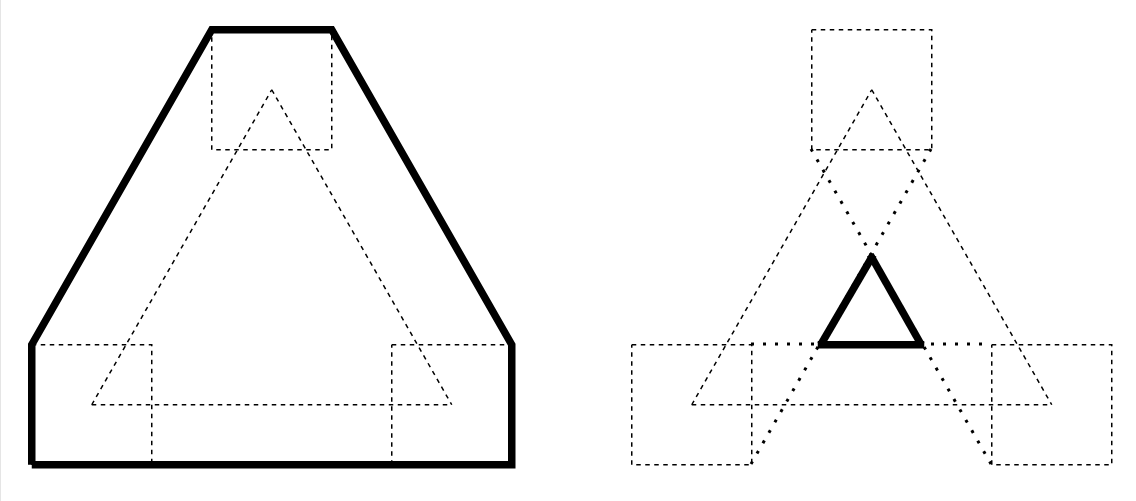

In [5]:
Image(filename="file.png")

### Задача 7

Матрица значений яркости

$$
{}^n \! \overset{n}{
    \begin{pmatrix}
        0 & 1 & 0 & \dots & 1 \\
        1 & 0 & 1 & \dots & 0 \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & 0 & 1 & \dots & 0 \\
    \end{pmatrix}
}
$$

Используется всего два уровня яркости, следовательно матрица GLCM имеет размер $2\times2$

$$
\begin{matrix}
  &    0   &    1   \\
0 & a_{00} & a_{01} \\
1 & a_{10} & a_{11} \\
\end{matrix}
$$

Для построения данной матрицы необходимо опеределить соседний пиксель, который параметризуется направлением $\varphi$ и расстоянием $d$.
* $\varphi$ - угол ($0^{\circ}$, $45^{\circ}$, $90^{\circ}$, $135^{\circ}$, $180^{\circ}$, $225^{\circ}$, $270^{\circ}$, $315^{\circ}$)
* $d$ - расстояние в пикселях

Из-за повторяемости шаблона изображение стоит рассматривать $d$ как четное и нечетное, а углы  $0^{\circ}$, $45^{\circ}$.

Матрицы для нечетного расстояния:
$$
\varphi = 0 ^{\circ} \;\begin{pmatrix} 0 & a_{01} \\ a_{10} & 0 \\ \end{pmatrix};\;
\varphi = 45^{\circ} \;\begin{pmatrix} a_{00} & 0 \\ 0 & a_{11} \\ \end{pmatrix};\;
$$

Матрицы для четного расстояния:
$$
\varphi = 0 ^{\circ} \;\begin{pmatrix} a_{00} & 0 \\ 0 & a_{11} \\ \end{pmatrix};\;
\varphi = 45^{\circ} \;\begin{pmatrix} a_{00} & 0 \\ 0 & a_{11} \\ \end{pmatrix};\;
$$

Т.е. в случае, когда $d$ - нечетное, а $\varphi$ - вертикальное или горизонтальное, матрица смежности не является диагональной.

Во всех остальных случаях матрица смежности -- диагональна.


### Задача 8

Детектор Харриса не инвариантен к **масштабу** изображения.  
(Так же на корректность работы детектора могут влиять и другие факторы, например наличие шума, но это не относится к трансформации изображения)

### Задача 9

In [6]:
w = 4
h = 2

def m(p,q):
    return sum([(x**p)*(y**q) for x in range(w) for y in range(h)])

def cm(p, q):
    return sum([((x-m(1,0)/m(0,0))**p)*((y-m(0,1)/m(0,0))**q) for x in range(w) for y in range(h)])

def eta(p, q):
    return cm(p,q)/np.power(cm(0,0), (p+q+2)/2)


In [7]:
print("Компактность:", ((w + h)*2)**2 / (w*h))

Компактность: 18.0


In [8]:
m_20 = cm(2,0)
m_02 = cm(0,2)
m_11 = cm(1,1)

print("Эксцентриситет:", 
      (m_20 + m_02 + np.sqrt((m_20 - m_02)**2 + 4*m_11**2))/(m_20 + m_02 - np.sqrt((m_20 - m_02)**2 + 4*m_11**2)))

Эксцентриситет: 5.0


In [9]:
print("Центр масс:", (m(1,0)/m(0,0), m(0,1)/m(0,0)))

Центр масс: (1.5, 0.5)


In [10]:
print("Ориентацию главной оси инерции", 0.5*np.arctan(2*m_11/(m_20-m_02)))

Ориентацию главной оси инерции 0.0


In [11]:
hu_1 = eta(0,2) + eta(2,0)
hu_2 = (eta(2,0) - eta(0,2))**2 + 4*eta(1,1)**2
hu_3 = (eta(3,0) - 3*eta(1,2))**2 + (3*eta(2,1) - eta(0,3))**2
hu_4 = (eta(3,0) + eta(1,2))**2 + (eta(2,1) + eta(0,3))**2

print("Первые 4-ре момента Hu:")
print(f"{hu_1 = }")
print(f"{hu_2 = }")
print(f"{hu_3 = }")
print(f"{hu_4 = }")

Первые 4-ре момента Hu:
hu_1 = 0.1875
hu_2 = 0.015625
hu_3 = 0.0
hu_4 = 0.0


### Задача 11

In [13]:
fx = fy = 0.01 * 10**6
cx = 950
cy = 550
y = 0
K = np.matrix([[fx, y, cx], [0, fy, cy], [0, 0, 1]])

for i in K.tolist():
    for j in i:
        print(f"%6d " % j, end="")
    print()


 10000      0    950 
     0  10000    550 
     0      0      1 
